In [43]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use('bmh')
import numpy as np
from IPython.display import display, Markdown
from ipywidgets import widgets, interact, interactive
from virtual_shpb_lib import runningMeanFast, virtual_SHPB

***Проект создан при финансовой поддержке гранта Президента Российской Федерации для поддержки молодых ученых докторов наук. Номер проекта МД***

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/constantinoval/virtual_shpb.git/master?filepath=main.ipynb)

# Инструкции по использованию методического материала
Документ содержит интерактивные ячейки. Для активации элементов управления и перехода в интерактивный режим необходимо выделить соответствующую ячейку левым кликом мыши и нажать на кнопку "Run" в панели инструментов.
![](run.png)

# Использование метода Кольского для определения динамических диаграмм деформирования конструкционных материалов при сжатии
***

## Описание метода

Метод расчета динамических напряжений в упругом стержне по измерению скорости свободного торца был впервые предложен Гопкинсоном. В 1949 г. Кольский предложил использовать стержень Гопкинсона для измерения напряжений и деформаций образца в виде тонкой прокладки между двумя длинными стержнями. Начиная с этого времени, развивается метод разрезного стержня Гопкинсона (РСГ), целью которого является испытание материалов при высоких скоростях деформации. Основными преимуществами метода является простота изготовления образцов и самого стержня, точное определение значительных (десятки процентов) деформаций образца, исключение изгиба образца при испытании на сжатие и растяжение, корректное теоретическое обоснование явлений, происходящих в системе упругий стержень–образец–упругий стержень.

Математическая модель РСГ представляет собой систему из трех стержней: двух бесконечно прочных и бесконечно длинных тонких стержней и "мягкого", очень короткого стержня–вставки (образца) между ними (Рисунок 1). Предпосылки и допущения метода Кольского следующие:
- ввиду очень малой длины образца по сравнению с длиной нагружающего импульса в образце в течение испытания реализуется одноосное напряженное состояние с равномерным распределением напряжений и деформаций по его длине (основная предпосылка метода). Таким образом, несмотря на высокие скорости деформации образца, испытание может рассматриваться как квазистатическое, 
- предел упругости мерных стержней должен быть значительно выше предела текучести образца, 
- при распространении волн в мерных стержнях отсутствует дисперсия, 
- распределение профиля деформации в пределах поперечного сечения стержня равномерное,
- поперечные колебания частиц стержня отсутствуют.


![fig1](fig1.png)

**Рисунок 1** – Схема метода Кольского

В одном из стержней *2* с помощью ударника *1* возбуждается одномерная упругая волна сжатия $ \varepsilon_I(t) $, которая распространяется по стержням со скоростью *С*. Картина распространения волн в РСГ представлена на рисунке 1 в виде Лагранжевой x~t диаграммы. При достижении образца *4* эта волна ввиду разницы площадей их поперечных сечений, а также акустических жесткостей $ \rho C $ материалов стержня и образца расщепляется: часть ее отражается обратно волной $ \varepsilon_R(t) $, а часть проходит через образец во второй стержень *5* волной $ \varepsilon_T(t) $. Образец при этом претерпевает упругопластическую деформацию, в то время как стержни деформируются упруго. Амплитуды и формы волн $ \varepsilon_R(t) $ и $ \varepsilon_T(t) $ определяются соотношением акустических жесткостей материалов стержней и образца, а также реакцией материала образца на приложенную динамическую нагрузку. Регистрируя тензодатчиками *3* и *6* эти упругие волны, удается по формулам, предложенным впервые Кольским, определить процессы изменения во времени напряжения, деформации и скорости деформации в образце.

Работа описанной выше методики иллюстрируется на анимациях 2-4. Рисунок 2 показывает общий вид установки, включающей ударник, мерные стержни и образец. На рисунке 3 показан укрупненный вид процессов нагружения мерного стержня ударником (слева) и деформирования образца между мерными стержнями в волне сжатия (справа).

![](SHPB-1.gif)
<img src="legend.png" width="550">
**Рисунок 2** - Общая схема экспеирментальной установки

|ударник|образец|
|:-------|:-------|
|![](striker-1.gif)|![](spec-1.gif)|

**Рисунок 3** - Слева - нагружение мерного стеожня ударником, справа - деформирование образца между стержнями

На рисунке 4 показана картина формирования, растпространения и расщепления импульсов в системе РСГ. Красная линия отвечает осевым напряжениям в нагружающем мерном стержне, зеленая - в опорном.

![](waves-1.gif)
**Рисунок 4** - Движенние волн в мерных стержнях

На рисунке 5 показаны типичные сигналы (временные зависимости), регистрируемые в эксперименте на сжатие датчиками в мерных стержнях.

<IPython.core.display.Javascript object>


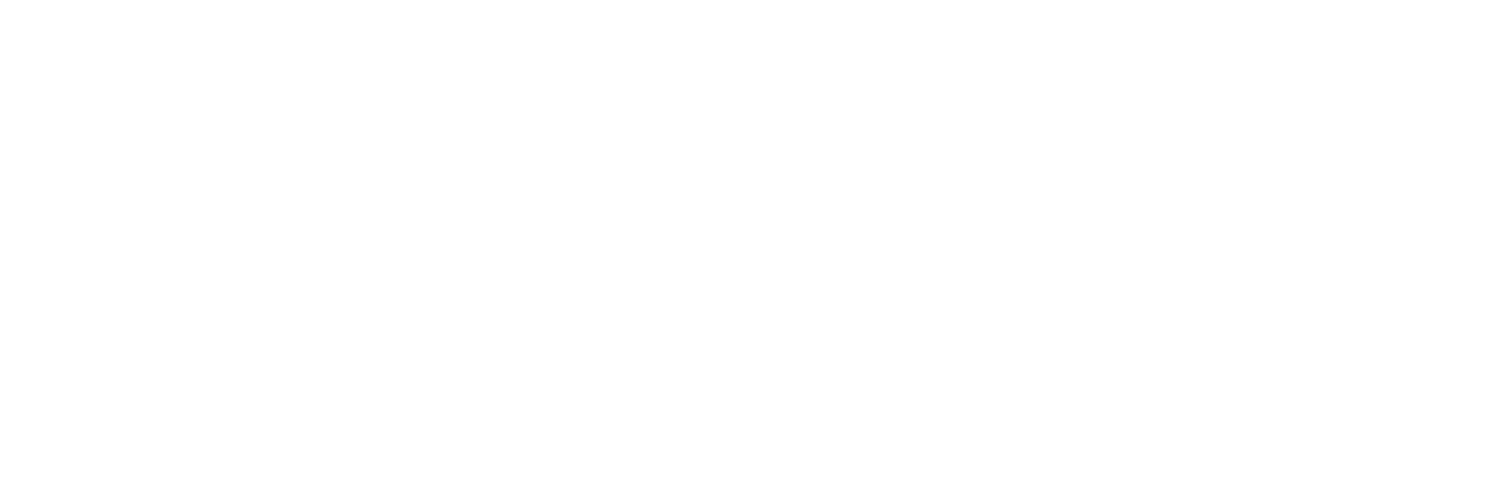

**Рисунок 5** - Типичные сигналы в эксперименте на сжатие

In [40]:
display(Markdown('На рисунке 5 показаны типичные сигналы (временные зависимости), регистрируемые в эксперименте на сжатие датчиками в мерных стержнях.'))
data = np.genfromtxt('v_dat.csv', skip_header=2, unpack=True, delimiter=',')
plt.figure(figsize=(15,5))
plt.plot(data[0], data[1]/2000, label='Нагружающий стержень')
plt.plot(data[0], data[2]/2000, label='Опорный стержень')
plt.xlabel('время, мс')
plt.ylabel('деформация в мерном стержне, %')
plt.legend()
plt.show()
display(Markdown('**Рисунок 5** - Типичные сигналы в эксперименте на сжатие'))

## Основные соотношения метода Кольского

При выводе основных соотношений метода РСГ предполагается, что поскольку образец имеет малую длину, а время прохождения волны по длине образца существенно меньше длительности нагружающего импульса, то напряженно-деформированное состояние образца близко к однородному, и процесс упругопластического деформирования образца подобен квазистатическому, но протекающему с высокими скоростями деформации. Для этого условия можно вывести простые параметрические зависимости определения напряжения, деформации и скорости деформации в образце на основании импульсов деформации, зарегистрированных в стержнях. При выводе формул все импульсы в стержнях условно считаются положительными. Деформации и напряжения также считаются положительными.

Схема нагружения образца упругими волнами показана на рисунке 2.

<img src="fig2.png" width="350">

**Рисунок 6** – Схема нагружения образца упругими волнами

Из одномерной теории распространения упругих волн известно, что массовая скорость в волне деформации связана с деформацией соотношением:

$$ V(t)=c\cdot\varepsilon(t) $$

где *c* – стержневая скорость звука, $ \varepsilon(t) $ - деформация в сечении стержня.

В движение правой (нагружаемой) границы образца вносят вклад падающая волна сжатия (которая приводит к смещению этой границы влево) и отраженная волна растяжения (так же вызывает смещение этой границы влево). Суммарную скорость можно рассчитать по формуле:

$$ V_1 (t)=c\cdot(\varepsilon_I(t)+\varepsilon_R(t)) $$

Скорость левой границы определяется прошедшей волной сжатия:

$$ V_2(t)=c\cdot\varepsilon_T(t) $$

Скорость изменения длины образца равна разности скоростей движения его торцов:

$$ V(t)=V_1(t)-V_2(t) $$

Техническая скорость деформации образца определяется выражением:

$$ \dot{\varepsilon}(t)=V(t)/L_0 $$ 

здесь $ L_0 $ - начальная длина образца.

Интегрируя эту зависимость по времени определяем деформацию образца:

$$ \varepsilon(t)= \int_0^t\dot{\varepsilon}(\tau)d\tau $$

С другой стороны мерные стержни можно рассматривать как очень жесткие пружины. По известной деформации в сечении стержня на основе закона Гука (так как волны упругие) можно рассчитать напряжение в сечении, умножая которую на площадь сечения, определяем силу. Сила, действующая на образец справа равна:

$$ F_1(t)=(\varepsilon_I(t)-\varepsilon_R(t))\cdot E\cdot S_b $$

где *E* – модуль упругости, $ S_b $ – площадь сечения стержня.

Сила, действующая на образец слева (со стороны опорного стержня):

$$ F_2(t)=\varepsilon_T(t)\cdot E \cdot S_b $$

Поскольку длина образца мала, а длительность нагрузки достаточно большая, можно считать, что в каждый момент времени образец находится в состоянии равновесия, т.е. сила, действующая на него справа, равна силе, действующей слева, что при условии идентичности нагружающего и опорного мерного стержней приводит к условию:

$$ \varepsilon_I(t)-\varepsilon_R(t)=\varepsilon_T(t) $$


> **Примечание**:
Часто в процессе испытания происходит обрыв датчиков на мерных стержнях, при прохождении по ним интенсивных волн. В случае, если удалось зарегистрировать два импульса, приведенное выше соотношение позволяет восстановить недостающий импульс деформации, необходимый для построения диаграммы. Так если нет регистрации отраженной волны, её можно рассчитать следующим образом:
$$ \varepsilon_R(t)=\varepsilon_I(t)-\varepsilon_T (t) $$
>В случае отсутствия прошедшего импульса деформации, можно считать, что:
$$ \varepsilon_T(t)=\varepsilon_I (t)-\varepsilon_R(t) $$

Среднюю силу, действующую на образец можно определить как:
$$ F(t)=\frac{F_1(t)+F_2(t)}{2} $$

Часто эту силу определяют по импульсу в опорном стержне:

$$ F(t)=F_2(t) $$

Техническое напряжение в образце получается при делении силы на его площадь сечения *S*:
$$ \sigma(t)=\frac{F(t)}{S} $$

Истинная деформация определяется по формуле:

$$ e(t)=-ln(1-\varepsilon(t)) $$

>**Примечание**: Так как предполагалось, что импульсы положительны, техническая деформация $ \varepsilon(t) $ имеет знак плюс, хотя в сопромате и теории упругости сжимающие деформации и напряжения считаются отрицательными.

>**Вопрос**: Истинная деформация при сжатии больше или меньше технической?

>Истинная деформация при сжатии больше технической, поскольку в процессе сжатия длина образца уменьшается, в то время как при расчете технической деформации изменение длины делится на начальную длину образца, которая больше текущей.
![](tech_strain.png)

Истинное напряжение определяется выражением:
$$ s(t)=\sigma(t) \cdot (1-\varepsilon(t)) $$

>**Вопрос**: Истинное напряжение при сжатии больше или меньше технического?

> Истинное напряжение при сжатии меньне технического, поскольку в процессе упруго-пластического деформирования увеличивается пложадь сечения образца. При расчете технического напряжения сила делится на начальную площадь, которая меньше текущей.
![](tech_stress.png)

Истинная скорость деформации определяется при дифференцировании истинной деформации по времени:
$$ \dot{e}(t)=\frac{de(t)}{dt}=\frac{\dot{\varepsilon}(t)}{1-\varepsilon(t)} $$

>**Вопрос**: Истинная скорость деформации при сжатии больше или меньше технической?

>Истинная скорость деформации при сжатии больше технической по той же причине, почему истинная деформация больше технической.
![](tech_strain_rate.png)

Исключая из зависимостей $ \varepsilon(t) $ и $ \sigma(t) $ (или $ e(t) $ и $ s(t) $) время как параметр, определяем диаграмму деформирования $ \sigma(\varepsilon) $ (или $ s(e) $) при известных условиях нагружения $ \dot{\varepsilon}(\varepsilon) $ (или $ \dot{e}(e) $). Варьируя скорость ударника можно получить диаграммы при разных скоростях деформации.

## Экспериментальная установка, реализующая метод Кольского

## Методика проведения эксперимента
Для определения диаграммы деформирования образца необходимо пройти три этапа:
    1. Подготовка экспериментальной установки
    2. Проведение испытаний
    3. Расчет параметров деформирования образца по данным с мерных стержней

### Подготовка экспериментальной установки
Подготовка экспериментальной установки является важным и ответственным этапом, от которого во многом зависят точность и достоверность результатов проводимого испытания. Основными этапами подготовки являются:

- Юстировка мерных стержней
- Расчет тарировочных коэффициентов
- Проведение динамической калибровки установки

**Юстировка мерных стержней** заключается в установке мерных стержней в креплениях таким образом, чтобы система "ударник-нагружающий мерный стержень-опорный мерный стержень" были соосны. Важным условием является то, чтобы торцы мерных стержней, между которыми устанавливается образец, были параллельны. От этого зависит равномерность деформирования образца.

Остановимся более подробно на процедуре расчета тарировочных коэффициентов.

#### Расчет тарировочных коэффициентов

Для построения диаграмм деформирования с использованием метода Кольского требуется информация об истории изменения упругих деформаций в сечениях нагружающего и опорного мерных стержней. Основным методом регистрации процессов в методе Кольского является [тензометрия](https://ru.wikipedia.org/wiki/Тензометрия). [Тензорезисторы](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BD%D0%B7%D0%BE%D1%80%D0%B5%D0%B7%D0%B8%D1%81%D1%82%D0%BE%D1%80) (рисунок 7) устанавливаются на мерный стержень для записи волн деформаций, проходящих через сечение мерного стержня (рисунок 8). Также датчики могут устанавливаться на сам образец (рисунок 9).

<img src="gauges.png" width="350">

**Рисунок 7** - Тензорезисторы

<img src="gauges-bar.jpg" width="550">

**Рисунок 8** - Тензодатчики на мерном стержне

<img src="gauges-sample.jpg" width="450">

**Рисунок 9** - Тензодатчики на образце

Информация с тензодатчиков регистрируется высокоскоростным осциллографом. Осциллограф позволяет записывать электрические напряжения в цепи питания датчиков, для расчета же деформаций в соответствии с основной тензометрической зависимостью необходима информация об изменении сопротивления тензодатчиков.

Основная тензометрическая зависимость выражается следующей формулой:
$$ k \cdot \varepsilon=\frac{\Delta R}{R} $$
здесь 	k – коэффициент тензочувствительности датчика,
	$ \varepsilon $ - деформация датчика,
	$ \Delta R $ –изменение сопротивления датчика при его деформировании,
	$ R $ – начальное сопротивление датчика.

Значения величин k и R берутся из паспорта на датчики (Рисунок 10).

<img src="gauges-pass.png" width="750">

**Рисунок 10** - Паспорт на тензодатчики

Для определения коэффициента пересчета напряжения, снимаемого с тензодатчиков, в их деформацию используется процедура тарировки. При этом в цепь питания последовательно с датчиками с помощью реле периодически включается известное сопротивление $ R^{тарир} $. Тем самым моделируется изменение сопротивления тензодатчиков на величину  $ R^{тарир} $. С помощью осциллографа регистрируются соответствующие изменения электрического напряжения в цепи питания датчиков (Рисунок 11).

<img src="tarir-1.png" width="550">

**Рисунок 11** - Скачки напряжения во время процедуры тарировки

Поскольку скачок напряжения пропорционален изменению сопротивления цепи, можно составить следующую пропорцию:
$$ \frac{\Delta U^{тарир}}{R^{тарир}} = \frac{\Delta U}{\Delta R}$$
где $ \Delta U^{тарир} $ – скачок напряжения во время тарировки (рисунок 12),
	$ R^{тарир} $ – тарировочное сопротивление,
	$ \Delta U $ – скачок напряжения при деформировании тензодатчиков,
	$ \Delta R $ – изменение сопротивления тензодатчиков при их деформировании.
    
<img src="tarir-2.png" width="550">

**Рисунок 12** - Скачки напряжения во время процедуры тарировки    
    
Из приведенных формул следует:
$$ \varepsilon = \frac{R^{тарир}}{k \cdot \Delta U^{тарир} \cdot R} \cdot \Delta U $$
Таким образом коэффициент пересчета (тарировочный коэффициент) равен:
$$ K=\frac{R^{тарир}}{k \cdot \Delta U^{тарир} \cdot R} $$


---

# Интерактивная ячейка

![](run.png)

***Перемещая ползунки, определите скачок напряжения при тарировке***

---

<IPython.core.display.Javascript object>


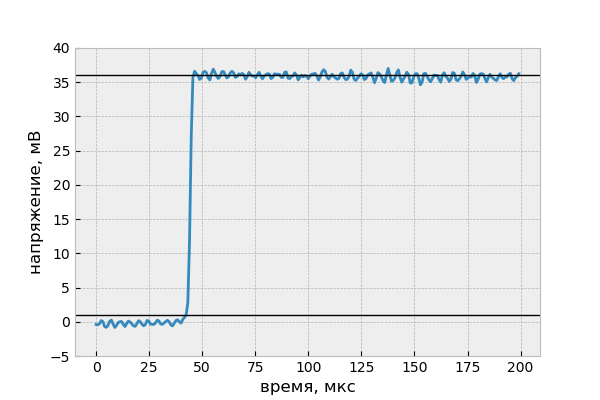

In [52]:
%matplotlib notebook
display(Markdown('---'))
display(Markdown('# Интерактивная ячейка'))
display(Markdown('![](run.png)'))
display(Markdown('***Перемещая ползунки, определите скачок напряжения при тарировке***'))
def f(x,y):
    l1.set_ydata([x])
    l2.set_ydata([y])
    fig.canvas.draw_idle()
    items[2].value=r"$K = \frac{5.1}{2.14 \cdot 1600 \cdot %d} = %f\ [1/мВ]$" % (abs(y-x),5.1/2.14/1600/abs(y-x))

items = [widgets.IntSlider(value=-1, min=-5, max=40, step=1, continuous_update=True, orientation='vertical',
                          description='Маркер 1'),
         widgets.IntSlider(value=10, min=-5, max=40, step=1, continuous_update=True, orientation='vertical',
                          description='Маркер 2'),
         widgets.Label(value="")    
]

i=interactive(f, x = items[0],
                 y = items[1])
display(widgets.HBox(items))
display(Markdown('---'))

data = np.genfromtxt('tarir.txt', skip_header=2, unpack=True)
fig = plt.figure(figsize=(6,4))
plt.plot(data[0]*1e6, data[1]*1000+0.5)
plt.xlabel('время, мкс')
plt.ylabel('напряжение, мВ')

plt.ylim(-5, 40)
ax = plt.gca()
l1=plt.axhline(-1, color='k', lw=1)
l2=plt.axhline(10, color='k', lw=1)

Можно ли проверить правильность расчета тарировочных коэффициентов? Да. Для этого используется спеуиальная процедура, называемая динамической калибровкой установки.

#### Динамическая калибровка

Для проверки тарировочных коэффициентов проводят испытания без образца. Мерные стержни при этом смыкаются таким образом, чтобы они находились в контакте. Схема представлена на рисунке 13.

![](dyn_kalibr.png)
**Рисунок 13** - Динамическая калибровка. Схема эксперимента

Характерные сигналы, регистрируемые в эксперименте, показаны на рисунке 14.

![](dyn_kalibr_osc.png)

**Рисунок 14** - Динамическая калибровка. Характерные сигналы

Для пересчета электрических напряжений, зарегистрированных с помощью осциллографа, в деформации, эти сигналы необходимо умножить на тарировочные коэффициенты K1 и K2, рассчитанные на предыдущем этапе. На рисунке Рисунок 15 показаны временные зависимости деформации двух групп тензодатчиков. Можно выделить три импульса, распространяющиеся по мерным стержням:
- Падающий импульс формируется при взаимодействии ударника с первым мерным стержнем и регистрируется первой группой тензодатчиков (в нагружающем стержне)
- Отраженный импульс возникает из-за неидеального контакта на стыке мерных стержней (наличие зазоров, свободных поверхностей) и регистрируется первой группой тензодатчиков (в нагружающем стержне)
- Прошедший импульс регистрируется второй группой тензодатчиков (в опорном стержне)

![](dyn_kalibr_osc2.png)

**Рисунок 15** - Деформации датчиков при динамической калибровке

Временное растояние между началом падающего импульса и началом прошедшего импульса $ \Delta T $ можно расчитать по формуле:
$$ \Delta T = \frac{L_1}{C_1} + \frac{L_2}{C_2}$$
здесь $ C_1 $ и $ C_2 $ - скорости звука в нагружающем и опорном мерном стержнях соответственно, $ L_1 $ и $ L_2 $ - расстояния от стыка мерных стержней до первой и второй групп тензодатчиков соответственно (см. рисунок 13).

Существенная амплитуда отраженного импульса говорит о наличие одного или нескольких из следующих недостатков установки:

- Плохие поверхности торцов мерных стержней (неплоскостность, наличие вмятин, сколов и пр.). Требуется отторцевать стержни.
- Несоосность мерных стержней. Необходимо провести юстировку установки.

Параметры падающего импульса деформации (при условии равенства диаметров и идентичности материалов стержня и ударника) можно рассчитать по формулам:

- длительность импульса
$$ T=\frac{2L}{C} $$
где $ L $ - длина ударника, $ C $ - стержневая скорость звука в материале мерного стержня (ударника)


- амплитуда импульса
$$ A=\frac{V_0}{2C} $$
где $ V_0 $ - скорость ударника, $ C $ - стержневая скорость звука в материале мерного стержня (ударника)

Таким образом, длительность нагружающего импульса определяется только длиной ударника, амплитуда – скоростью ударника.

![](incident.png)
**Рисунок 16** - Параметры падающего импульса

Если тарировочные коэффициенты посчитаны правильно, мерные стержни имеют ровные торцы и выставлены соосно, то отраженный импульс должен быть очень мал, а прошедший импульс деформации должен совпадать с падающим. Алгебраическая сумма импульсов (с учетом знаков) должна быть близка к нулю (Рисунок 17).

![](dyn_kalibr_pulses.png)

**Рисунок 17** - Контроль установки по импульсам


### Проведение испытаний

При испытании материалов по методу Кольского образец в виде таблетки устанавливают между длинными стержнями и эту систему нагружают ударом относительно короткого стержня-бойка (Рисунок 18). При этом в первом стержне (нагружающем) формируется импульс, который движется в сторону образца и нагружает (деформирует) его.

![](exp_setup.png)
**Рисунок 18** - Схема испытаний на сжатие по методу Кольсого

Испытание состоит из следующих шагов:

- Измерение образца.
- Установка образца между мерными стержнями. Для уменьшения эффектов трения контактные поверхности образца и мерных стержней смазываются.
- Установка ударника выбранной длины в газовую пушку.
- Проверка целостности электрических цепей питания тензодатчиков и измерителя скорости.
- Запуск компрессора для нагнетения заданного давления в рабочую камеру (или камеру высокого давления) пушки. Величина давления определяет скорост вылета ударника, а значит влияет на амплитуду нагружающего импульса, что, в свою очередь, сказывается на скорости деформации образца.
- Запуск регистрирующей аппаратуры.
- Выстрел из пушки.
- Сохранения сигналов на персональном компьютере для дальнейшей обработки.
- Визуальный осмотр и измеренние образца после динамического нагружения. Занесение результатов в экспериментальную таблицу.

Регистрация с помощью тензодатчиков падающего $ \varepsilon_I $, отраженного $ \varepsilon_R $ и прошедшего $ \varepsilon_T $ импульсов деформации в мерных стержнях позволяет рассчитать изменение длины образца во времени и действующую на него при этом силу, и таким образом, построить диаграмму его деформирования по формулам Кольского.

Как правило, исходные импульсы содержат шумы. Для построения диаграммы деформирования необходимо проводить сглаживание сигналов. При этом параметры сглаживания не должны существенным образом искажать форму сигналов.\

---

# Интерактивная ячейка

![](run.png)

Интерактивная форма иллюстрирует процедуру сглаживания методом скользящего среднего.Двигая ползунок можно изменять число точек, по которым происходит осреднение данных. Обратите внимание, что при n>300 заметно уменьшаются наклоны фронтов импульсов, что в дальнейшем может привести к существенным погрешностям в определении механических характеристик материала.

<IPython.core.display.Javascript object>


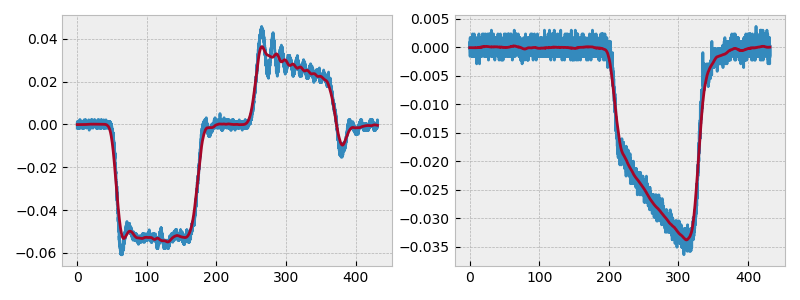

interactive(children=(IntSlider(value=500, description='n', max=1000, min=50, step=50), Output()), _dom_classe…

In [53]:
%matplotlib notebook
display(Markdown('---'))
display(Markdown('# Интерактивная ячейка'))
display(Markdown('![](run.png)'))

display(Markdown('Интерактивная форма иллюстрирует процедуру сглаживания методом скользящего среднего.\
Двигая ползунок можно изменять число точек, по которым происходит осреднение данных. Обратите внимание, \
что при n>300 заметно уменьшаются наклоны фронтов импульсов, что в дальнейшем может привести к существенным \
погрешностям в определении механических характеристик материала.'))

data2 = np.genfromtxt('osc_example.txt', skip_header=1, unpack=True)
f2, ax2 = plt.subplots(1,2, figsize=(8,3))

ax2[0].plot(data2[0], data2[1])
ax2[1].plot(data2[0], data2[2])
n = 50
sm1 = runningMeanFast(data2[1], n)
sm2 = runningMeanFast(data2[2], n)
l10,=ax2[0].plot(data2[0], sm1)
l11,=ax2[1].plot(data2[0], sm2)
plt.tight_layout()
def interact_loop2(n):
    sm1 = runningMeanFast(data2[1], n)
    l10.set_ydata(sm1)
    sm2 = runningMeanFast(data2[2], n)
    l11.set_ydata(sm2)
    f2.canvas.draw_idle()

i2 = interactive(interact_loop2, n=(50, 1000, 50))
i2

## Интерактивные примеры

## Упражнения на виртуальном стенде